In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [2]:
data=pd.read_csv('Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.drop(['animal name'],axis=1,inplace=True)
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.duplicated()

0      False
1      False
2      False
3       True
4      False
       ...  
96     False
97     False
98      True
99      True
100     True
Length: 101, dtype: bool

In [5]:
data.drop_duplicates(data,inplace=True)
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [6]:
data.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [7]:
data.shape

(59, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 97
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      59 non-null     int64
 1   feathers  59 non-null     int64
 2   eggs      59 non-null     int64
 3   milk      59 non-null     int64
 4   airborne  59 non-null     int64
 5   aquatic   59 non-null     int64
 6   predator  59 non-null     int64
 7   toothed   59 non-null     int64
 8   backbone  59 non-null     int64
 9   breathes  59 non-null     int64
 10  venomous  59 non-null     int64
 11  fins      59 non-null     int64
 12  legs      59 non-null     int64
 13  tail      59 non-null     int64
 14  domestic  59 non-null     int64
 15  catsize   59 non-null     int64
 16  type      59 non-null     int64
dtypes: int64(17)
memory usage: 8.3 KB


In [9]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.355932,0.203390,0.661017,0.322034,0.237288,0.40678,0.576271,0.525424,0.762712,0.796610,0.135593,0.135593,2.898305,0.644068,0.135593,0.389831,3.220339
std,0.482905,0.405975,0.477427,0.471267,0.429072,0.49545,0.498390,0.503640,0.429072,0.405975,0.345295,0.345295,2.155146,0.482905,0.345295,0.491898,2.228869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
target=data[['type']]
target.head()

,type
0,1
1,1
2,4
4,1
6,1


In [11]:
features=data.drop('type',axis=1)
features.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1


In [12]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.70,random_state=70)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(41, 16)
(41, 1)
(18, 16)
(18, 1)


In [14]:
knn=KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred=knn.predict(x_test)
y_pred

array([2, 2, 5, 1, 4, 4, 1, 3, 1, 6, 6, 1, 1, 4, 2, 5, 5, 2], dtype=int64)

In [37]:
y_df=pd.DataFrame(data=y_pred)

In [17]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      0.25      0.40         4
           4       0.67      1.00      0.80         2
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         2

    accuracy                           0.83        18
   macro avg       0.83      0.88      0.78        18
weighted avg       0.93      0.83      0.82        18



In [19]:
error1= []
error2= []

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: 

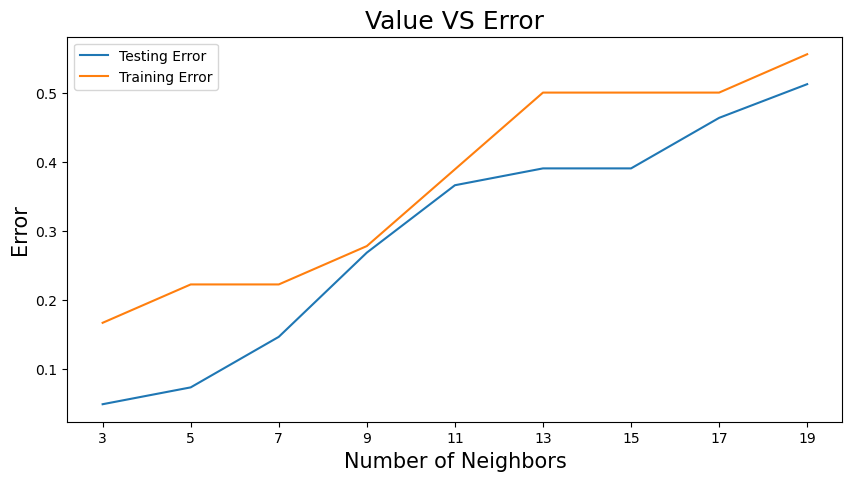

In [20]:
k_range = [i for i in range(3,21,2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(41,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(18,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[10,5])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('Value VS Error', fontsize = 18)
plt.xlabel('Number of Neighbors', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.xticks(k_range)
plt.show()

In [21]:
train_accuracy = []
test_accuracy = []

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

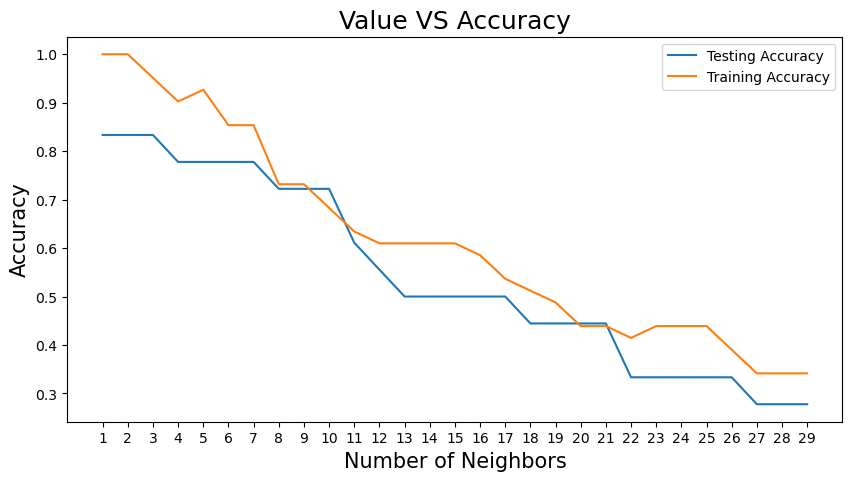

In [22]:
k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

plt.figure(figsize=[10,5])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy',fontsize = 18)
plt.xlabel('Number of Neighbors',fontsize = 15)
plt.ylabel('Accuracy',fontsize = 15)
plt.xticks(k_range)
plt.show()

### Grid search

In [23]:
params={'n_neighbors':[1,2,3,4,5,6,78,9,10,20,30,40]}

In [24]:
grid_search=GridSearchCV(knn,params)

In [25]:
grid_search.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\User

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 78, 9, 10, 20, 30,
                                         40]})

In [26]:
grid_search.best_params_

{'n_neighbors': 1}

In [27]:
var=range(1,90)

In [28]:
params=dict(n_neighbors=var)

In [29]:
params

{'n_neighbors': range(1, 90)}

In [30]:
grid_search=GridSearchCV(knn,params)

In [31]:
grid_search.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\User

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': range(1, 90)})

In [32]:
grid_search.best_params_

{'n_neighbors': 1}

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


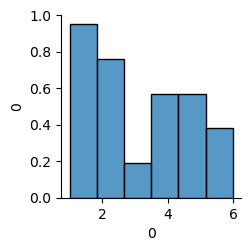

In [38]:
sns.pairplot(data=y_df)

<Axes: >

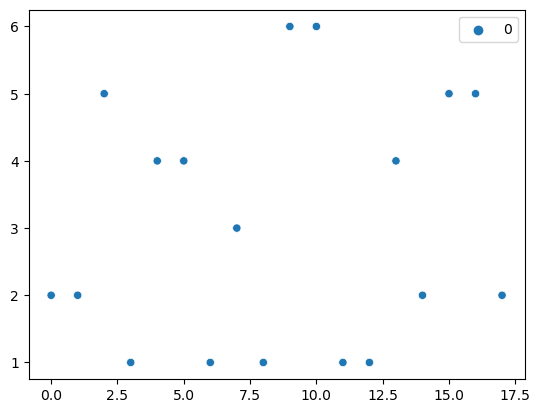

In [40]:
sns.scatterplot(data=y_df)